# **Linear classifier**

In the first lecture, we have discussed binary classification and linear classifiers that separate points between two classes with a **separating hyperplane**. How exactly this hyperplane is chosen is a subject for an ML course. In this notebook, you will experiment with such a hyperplane output by one particular ML model, Support Vector Machines (SVM).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

Let's generate some data first (change `random_seed` in case you want to generate a different set of points).

In [2]:
X, class_labels = make_blobs(n_samples=100, centers=2, random_state=0)

We have obtained 100 points in 2D, and each of them belongs to one of the two classes. The data is stored in the `X` array, and class labels are in `class_labels`. Let's visualize this:

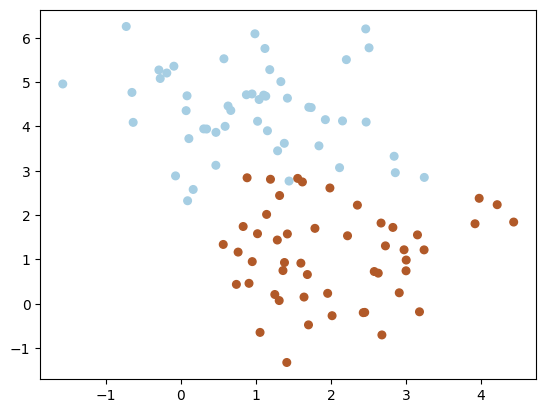

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=class_labels, s=30, cmap=plt.cm.Paired)

Let's use SVM to learn a separating hyperplane (in this 2D case, separating line) that nicely divides the two classes:

In [5]:
svm = SVC(kernel='linear')
svm.fit(X, class_labels)

SVC(kernel='linear')

Don't worry about SVM works, you can treat it as a black box for now. Important is that it has learned some separating hyperplane.

`coef_`  and `intercept_` attributes of an `SVM` object store hyperplane weights $w$ and the intercept $b$, respectively. Let's print them out!

In [14]:
# TODO: what is the equation defining the separating hyperplane
# learned by SVM?

(w1, w2), *_ = svm.coef_
b, *_ = svm.intercept_
print(w1, w2, b)

0.23432872996016207 -1.828502400285112 4.416192206616446


Now, let's plot the hyperplane together with the data.

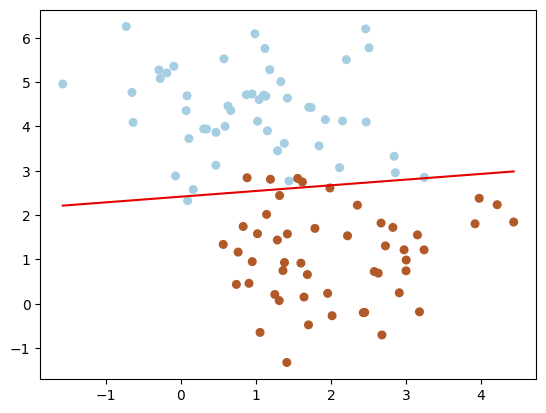

In [23]:
x_array = X[:, 0]
x_min, x_max = x_array.min(), x_array.max()

y_svm_min = (-x_min*w1 - b)/w2
y_svm_max = (-x_max*w1 - b)/w2

plt.scatter(X[:, 0], X[:, 1], c=class_labels, s=30, cmap=plt.cm.Paired)
plt.plot([x_min, x_max], [y_svm_min, y_svm_max], c='xkcd:red')

How does SVM classify the data points? We can get its predictions with a `predict()` method:

In [24]:
svm_predictions = svm.predict(X)
svm_predictions

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

Re-implement classification logic yourself by manually comparing the position of each data point w.r.t. the hyperplane and assigining the corresponding class label. Make sure your predictions are the same as those obtained via the `predict()` method.

In [41]:
# TODO: given the separated hyperplane SVM learned,
# re-implement classification process from scratch

def manual_predict(coef, intercept, x):
  if np.dot(coef, x) + intercept > 0:
    return 1
  return 0

manual_predictions = np.array(list(map(lambda x: manual_predict([w1, w2], b, x), zip(X[:, 0], X[:, 1]))))
assert all(manual_predictions == svm_predictions)

How many examples were misclassified? Can you spot them on the plot you made above?

In [45]:
# TODO: count the number of misclassified examples
# and make sure you can spot all of them on the plot
cnt = 0
for m, r in zip(manual_predictions, class_labels):
  if m != r:
    cnt += 1
print(cnt)

5
